<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Metodo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. DEFINICIÓN DEL PROBLEMA Y SOLUCIÓN ANALÍTICA
# ==========================================

x = sp.symbols('x')
u = sp.Function('u')

# La ecuación de la imagen es: -u'' + u - x = 0
# Reescrita para dsolve: -u''(x) + u(x) - x = 0
ode = -u(x).diff(x, x) + u(x) - x

# Condiciones de frontera: u(0) = 0, u(1) = 0
condiciones = {u(0): 0, u(1): 0}

# Resolución analítica exacta
sol_exacta = sp.dsolve(ode, u(x), ics=condiciones)
u_exacta_expr = sol_exacta.rhs  # Extraemos solo la parte derecha de la igualdad

print("--- Solución Exacta (Analítica) ---")
sp.pprint(u_exacta_expr)
print("\n")



--- Función de prueba u3 ---
α₁⋅sin(π⋅x) + α₂⋅sin(2⋅π⋅x) + α₃⋅sin(3⋅π⋅x)

--- Sistema de ecuaciones generado (Integrales) ---
Eq 1: alpha_1/2 + pi**2*alpha_1/2 - 1/pi = 0
Eq 2: alpha_2/2 + 2*pi**2*alpha_2 + 1/(2*pi) = 0
Eq 3: alpha_3/2 + 9*pi**2*alpha_3/2 - 1/(3*pi) = 0

--- Coeficientes calculados ---
⎧      2           -1               2     ⎫
⎪α₁: ──────, α₂: ────────, α₃: ───────────⎪
⎨         3             3                3⎬
⎪    π + π       π + 4⋅π       3⋅π + 27⋅π ⎪
⎩                                         ⎭

--- Solución aproximada final (Galerkin) ---
2⋅sin(π⋅x)   sin(2⋅π⋅x)   2⋅sin(3⋅π⋅x)
────────── - ────────── + ────────────
       3             3              3 
  π + π       π + 4⋅π     3⋅π + 27⋅π  


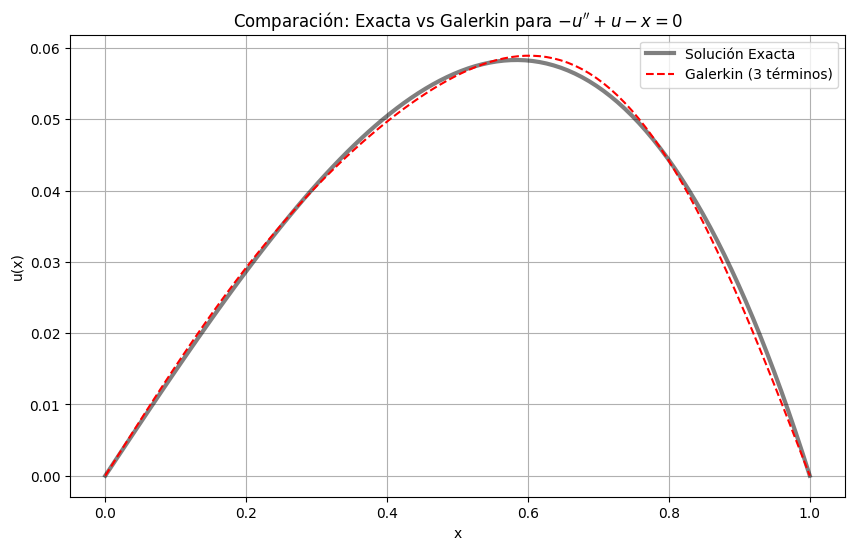

In [ ]:

# ==========================================
# 2. MÉTODO DE GALERKIN (Aproximación Numérica)
# ==========================================

# Definimos los coeficientes incógnita (alpha_i)
a1, a2, a3 = sp.symbols('alpha_1 alpha_2 alpha_3')

# Definimos las funciones base phi_i(x) = sin(i * pi * x)
# Nota: La imagen tiene una errata y dice "beta" en la fórmula pero define "phi".
# Usamos senos como indica el texto.
phi_1 = sp.sin(1 * sp.pi * x)
phi_2 = sp.sin(2 * sp.pi * x)
phi_3 = sp.sin(3 * sp.pi * x)

# Construimos la función de prueba u3 como combinación lineal
u_approx = a1*phi_1 + a2*phi_2 + a3*phi_3

print("--- Función de prueba u3 ---")
sp.pprint(u_approx)

# Definimos el Residuo (R o E)
# R = Ecuación diferencial evaluada con u_approx
# Ecuación original: -u'' + u - x = 0
R = -sp.diff(u_approx, x, 2) + u_approx - x

# Aplicamos el criterio de Galerkin:
# La integral del Residuo ponderado por cada función base debe ser 0.
# Integral(R * phi_i) dx = 0 en [0, 1]

eq1 = sp.integrate(R * phi_1, (x, 0, 1))
eq2 = sp.integrate(R * phi_2, (x, 0, 1))
eq3 = sp.integrate(R * phi_3, (x, 0, 1))

print("\n--- Sistema de ecuaciones generado (Integrales) ---")
print(f"Eq 1: {eq1} = 0")
print(f"Eq 2: {eq2} = 0")
print(f"Eq 3: {eq3} = 0")

# Resolvemos el sistema lineal para encontrar los alphas
sol_alphas = sp.solve([eq1, eq2, eq3], [a1, a2, a3])

print("\n--- Coeficientes calculados ---")
sp.pprint(sol_alphas)

# Sustituimos los coeficientes en la función aproximada
u_galerkin = u_approx.subs(sol_alphas)

print("\n--- Solución aproximada final (Galerkin) ---")
sp.pprint(u_galerkin)


In [ ]:


# ==========================================
# 3. GRÁFICAS Y COMPARACIÓN
# ==========================================

# Convertimos las expresiones simbólicas a funciones numéricas (numpy) para graficar
f_exacta = sp.lambdify(x, u_exacta_expr, modules="numpy")
f_galerkin = sp.lambdify(x, u_galerkin, modules="numpy")

# Generamos puntos en x
x_vals = np.linspace(0, 1, 100)
y_exacta = f_exacta(x_vals)
y_galerkin = f_galerkin(x_vals)

plt.figure(figsize=(10, 6))

# Graficamos
plt.plot(x_vals, y_exacta, 'k-', linewidth=3, alpha=0.5, label='Solución Exacta')
plt.plot(x_vals, y_galerkin, 'r--', linewidth=1.5, label='Galerkin (3 términos)')

# Decoración de la gráfica
plt.title(r"Comparación: Exacta vs Galerkin para $-u'' + u - x = 0$")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:

# ==========================================
# 4. CÁLCULO DEL ERROR
# ==========================================

# Error máximo puntual (Diferencia absoluta máxima en los puntos evaluados)
error_max = np.max(np.abs(y_exacta - y_galerkin))

# Error cuadrático medio (L2) usando integración simbólica
error_sq = (u_exacta_expr - u_galerkin)**2
error_l2 = sp.sqrt(sp.integrate(error_sq, (x, 0, 1))).evalf()

print(f"Error máximo puntual: {error_max:.6e}")
print(f"Error norma L2 (integral): {error_l2:.6e}")